In [117]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.cluster import SpectralClustering
from pprint import pprint
import copy

In [109]:
Kmm = pd.read_csv("Kmm.csv")
STATES = [
    'Alaska', 'Alabama', 'Arkansas', 'Arizona', 
    'California', 'Colorado', 'Connecticut', 'District of Columbia', 
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 
    'Illinois', 'Indiana', 'Kansas'
]
N = 17
P = 15

In [110]:
def sub_matrix(k, states):
    states_indices = [STATES.index(s) for s in states]
    
    l = []
    for i in states_indices:
        l += list(range(i*P, (i+1)*P))

    return k[l,:][:,l]

In [164]:
def get_clusters(clustering, keys):
    clusters = []

    labels = clustering.labels_
    
    for i, k in enumerate(keys):
        clusters.append((k, Counter(labels[i*P:(i+1)*P]).most_common(1)[0][0]))
    
    return dict(clusters)

In [171]:
def cluster(prev_cluster):
    if len(prev_cluster) <= 1:
        return
    
    Kmm_sub = sub_matrix(Kmm.values, prev_cluster.keys())
    clustering = SpectralClustering(
        n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans', n_neighbors=P, random_state=123
    ).fit(Kmm_sub)

    clusters = get_clusters(clustering, list(prev_cluster.keys()))
    pprint(clusters)
#     print(set(clustering.labels_), set(clusters.values()))
    
    if len(set(clusters.values())) == 1:
        return
    
    for c in set(clusters.values()):
        sub_cluster = {k: v for k, v in clusters.items() if v == c}
        cluster(sub_cluster)

In [172]:
cluster({s: 0 for s in STATES})

/Users/leo/.pyenv/versions/3.8.7/envs/covid/lib/python3.8/site-packages/sklearn/cluster/_spectral.py:504: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Users/leo/.pyenv/versions/3.8.7/envs/covid/lib/python3.8/site-packages/sklearn/cluster/_spectral.py:504: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Users/leo/.pyenv/versions/3.8.7/envs/covid/lib/python3.8/site-packages/sklearn/cluster/_spectral.py:504: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering 

{'Alabama': 0,
 'Alaska': 0,
 'Arizona': 0,
 'Arkansas': 0,
 'California': 0,
 'Colorado': 0,
 'Connecticut': 0,
 'Delaware': 0,
 'District of Columbia': 0,
 'Florida': 1,
 'Georgia': 1,
 'Hawaii': 1,
 'Idaho': 1,
 'Illinois': 1,
 'Indiana': 1,
 'Iowa': 1,
 'Kansas': 1}
{'Alabama': 0,
 'Alaska': 0,
 'Arizona': 0,
 'Arkansas': 0,
 'California': 1,
 'Colorado': 1,
 'Connecticut': 1,
 'Delaware': 1,
 'District of Columbia': 1}
{'Alabama': 1, 'Alaska': 1, 'Arizona': 0, 'Arkansas': 0}
{'Arizona': 0, 'Arkansas': 0}
{'Alabama': 0, 'Alaska': 1}
{'California': 0,
 'Colorado': 0,
 'Connecticut': 0,
 'Delaware': 0,
 'District of Columbia': 0}
{'Florida': 0,
 'Georgia': 0,
 'Hawaii': 0,
 'Idaho': 0,
 'Illinois': 1,
 'Indiana': 0,
 'Iowa': 0,
 'Kansas': 0}
{'Florida': 0,
 'Georgia': 0,
 'Hawaii': 0,
 'Idaho': 0,
 'Indiana': 1,
 'Iowa': 0,
 'Kansas': 0}
{'Florida': 0, 'Georgia': 0, 'Hawaii': 1, 'Idaho': 0, 'Iowa': 0, 'Kansas': 0}
{'Florida': 1, 'Georgia': 0, 'Idaho': 0, 'Iowa': 0, 'Kansas': 1}
{'Geo

In [76]:
import glob
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [77]:
no_interaction = pd.read_csv("results/no_interaction.csv", index_col=0)
no_interaction = no_interaction[
    ["States", "train_error_custom", "test_error_custom", "average_variance_custom"]
].set_index("States")

full_interaction = pd.read_csv("results/full_interaction.csv", index_col=0)
full_interaction = full_interaction[
    ["States", "train_error_custom", "test_error_custom", "average_variance_custom"]
].set_index("States")

In [78]:
all_res = {}
for p in glob.glob("results/cluster_*.csv"):
    states = p.replace("results/cluster_", "").replace("_interaction.csv", "").split("+")
    df = pd.read_csv(p, index_col=0)
    df = df[["States", "train_error_custom", "test_error_custom", "average_variance_custom"]].set_index("States")
    
    
    changes_vs_no_interaction = defaultdict(dict)
    changes_vs_full_interaction = defaultdict(dict)
    
    for s in states:
        for att in ["train_error_custom", "test_error_custom", "average_variance_custom"]:
            changes_vs_no_interaction[att][s] = (no_interaction.at[s, att] - df.at[s, att]) / no_interaction.at[s, att]
            changes_vs_full_interaction[att][s] = (full_interaction.at[s, att] - df.at[s, att]) / full_interaction.at[s, att]
            
    all_res[tuple(states)] = (changes_vs_no_interaction, changes_vs_full_interaction)

In [79]:
all_res

{('Florida',
  'Georgia',
  'Hawaii',
  'Idaho',
  'Indiana',
  'Iowa',
  'Kansas'): (defaultdict(dict,
              {'train_error_custom': {'Florida': 0.6196409317696657,
                'Georgia': 0.35096516253225335,
                'Hawaii': -0.2004625311393051,
                'Idaho': 0.41501479776766875,
                'Indiana': 0.2174751428647107,
                'Iowa': 0.1579874504237212,
                'Kansas': 0.19898982932479947},
               'test_error_custom': {'Florida': -4.1651705271868815,
                'Georgia': 0.5828154775224511,
                'Hawaii': 0.2803120142701882,
                'Idaho': 0.795757712894126,
                'Indiana': -15.021736722639986,
                'Iowa': -7.433373617737071,
                'Kansas': 0.0940799067311656},
               'average_variance_custom': {'Florida': -0.008304639929906574,
                'Georgia': 0.025764297617104668,
                'Hawaii': 0.21533772947039648,
                'Idaho': -0.0

## Cluster 1

{'Alabama': 0.39502214389871987, 'Alaska': 0.10653641180964178, 'Arizona': 0.06917725992699432, 'Arkansas': -0.08548816425840085, 'California': 0.28827232111560863, 'Colorado': 0.19280190926283877, 'Connecticut': 0.019050334118745633, 'Delaware': -0.06123037893846298, 'District of Columbia': 0.016503478861779847}


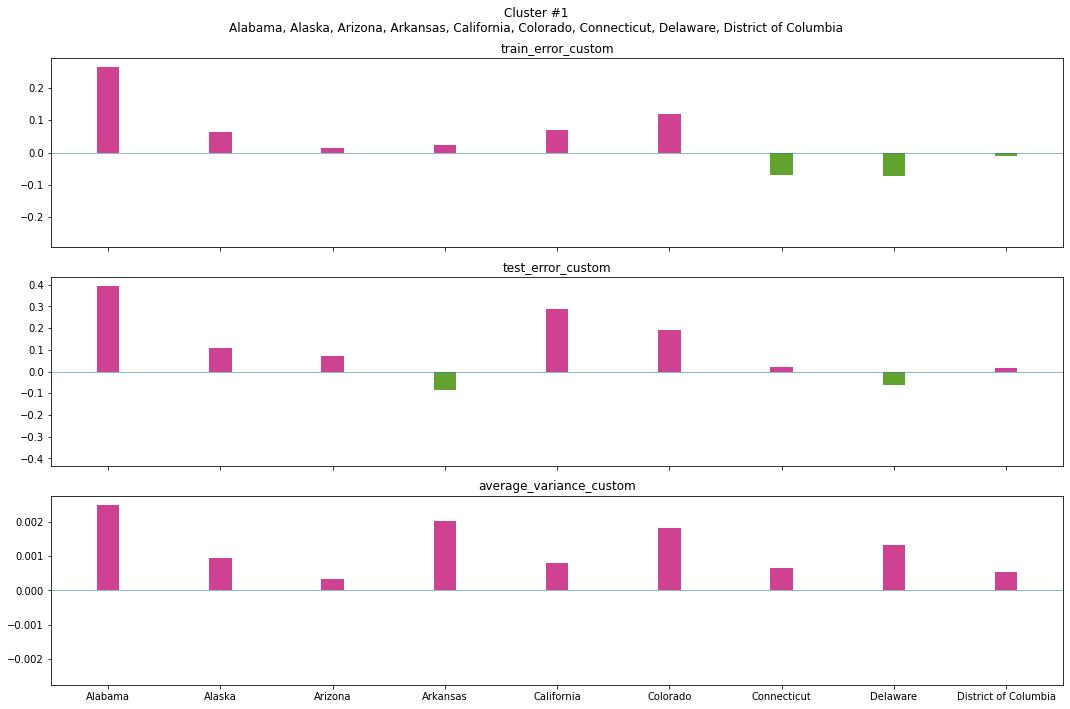

In [80]:
cluster = (
  'Alabama',
  'Alaska',
  'Arizona',
  'Arkansas',
  'California',
  'Colorado',
  'Connecticut',
  'Delaware',
  'District of Columbia'
)

fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i, (att, vals) in enumerate(all_res[cluster][1].items()):
    if att == "test_error_custom":
        print(vals)
    xs = vals.keys()
    vals = np.array(list(vals.values()))
    axs[i].axhline(y = 0, lw=0.5)
    axs[i].bar(xs, np.ma.masked_less_equal(vals, 0), color="#cf4191", width=0.2)
    axs[i].bar(xs, np.ma.masked_where(vals>0, vals), color="#62a32e", width=0.2)
    axs[i].set_ylim([-np.max(np.abs(vals))*1.1, np.max(np.abs(vals))*1.1])
    axs[i].set_title(att)
    
fig.suptitle(f"Cluster #1\n{', '.join(cluster)}")
fig.tight_layout()

## Cluster 2

{'Florida': 0.21671167576368766, 'Georgia': 0.03771378361897512, 'Hawaii': -0.010892295899061278, 'Idaho': -0.01896222664560961, 'Illinois': 0.008066471061102996, 'Indiana': 0.01628660078669774, 'Iowa': -0.06102300591791892, 'Kansas': -0.013967373570397719}


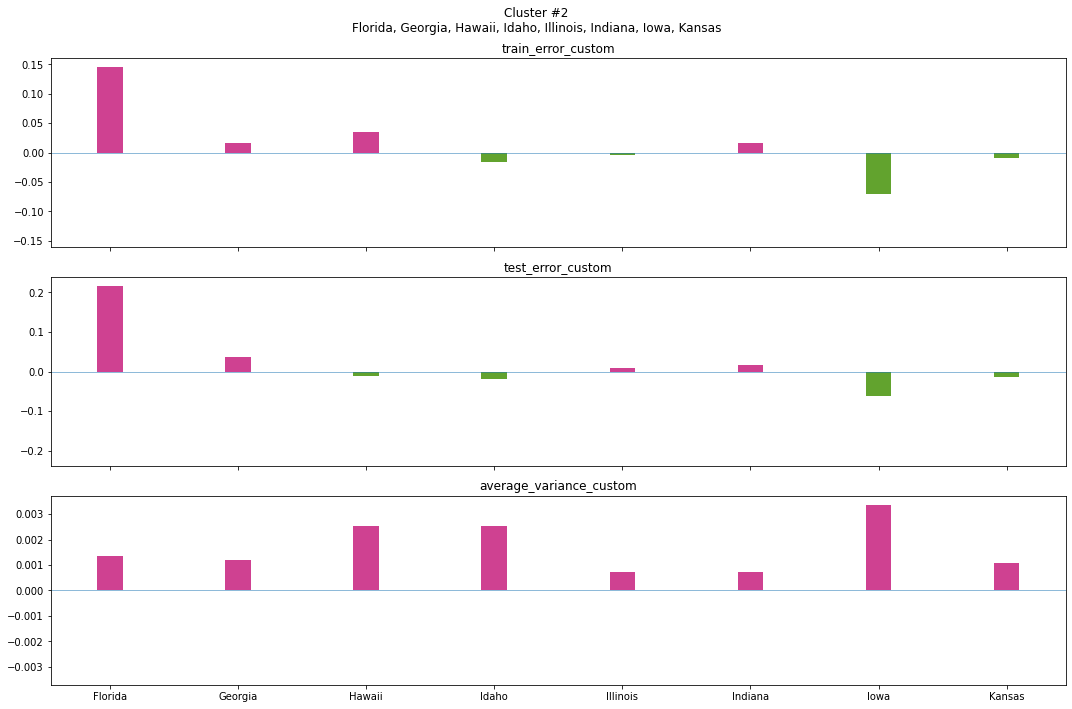

In [81]:
cluster = (
  'Florida',
  'Georgia',
  'Hawaii',
  'Idaho',
  'Illinois',
  'Indiana',
  'Iowa',
  'Kansas'
)

fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i, (att, vals) in enumerate(all_res[cluster][1].items()):
    if att == "test_error_custom":
        print(vals)
    xs = vals.keys()
    vals = np.array(list(vals.values()))
    axs[i].axhline(y = 0, lw=0.5)
    axs[i].bar(xs, np.ma.masked_less_equal(vals, 0), color="#cf4191", width=0.2)
    axs[i].bar(xs, np.ma.masked_where(vals>0, vals), color="#62a32e", width=0.2)
    axs[i].set_ylim([-np.max(np.abs(vals))*1.1, np.max(np.abs(vals))*1.1])
    axs[i].set_title(att)
    
fig.suptitle(f"Cluster #2\n{', '.join(cluster)}")
fig.tight_layout()

## Cluster 3

{'Alabama': 0.6000720031923041, 'Alaska': 0.1423790809193157, 'Arizona': 0.042801150417729916, 'Arkansas': 0.41465431511719714}


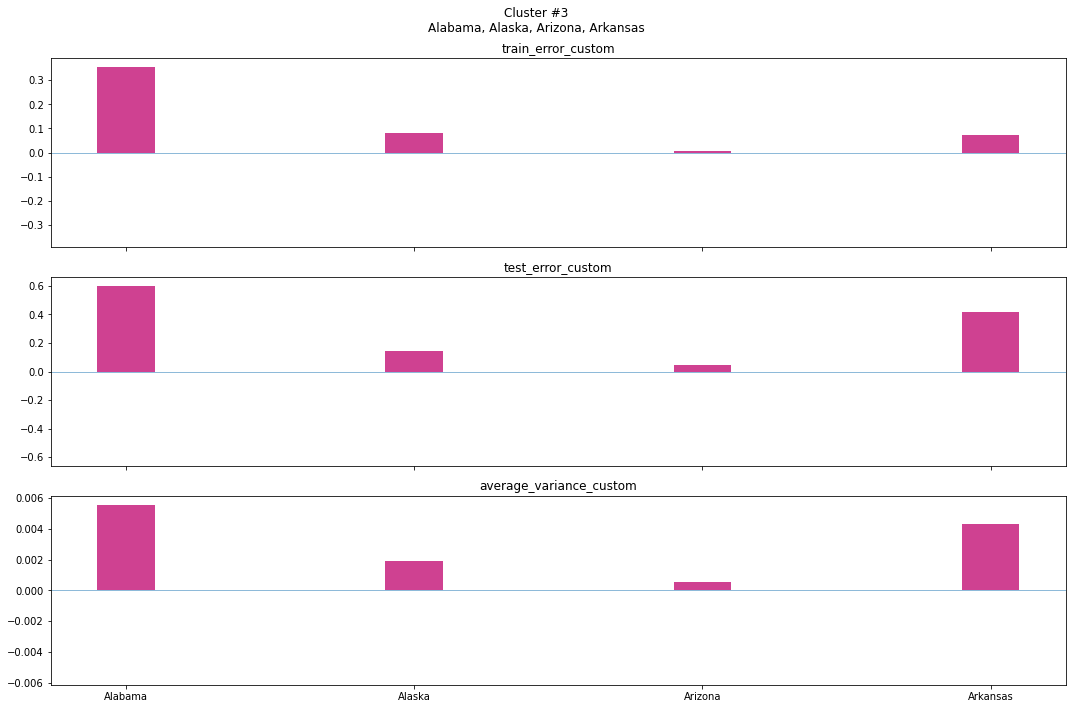

In [82]:
cluster = (
  'Alabama',
  'Alaska',
  'Arizona',
  'Arkansas'
)

fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i, (att, vals) in enumerate(all_res[cluster][1].items()):
    if att == "test_error_custom":
        print(vals)
    xs = vals.keys()
    vals = np.array(list(vals.values()))
    axs[i].axhline(y = 0, lw=0.5)
    axs[i].bar(xs, np.ma.masked_less_equal(vals, 0), color="#cf4191", width=0.2)
    axs[i].bar(xs, np.ma.masked_where(vals>0, vals), color="#62a32e", width=0.2)
    axs[i].set_ylim([-np.max(np.abs(vals))*1.1, np.max(np.abs(vals))*1.1])
    axs[i].set_title(att)
    
fig.suptitle(f"Cluster #3\n{', '.join(cluster)}")
fig.tight_layout()

## Cluster 4

{'California': 0.33174359884410304, 'Colorado': 0.1785140355671294, 'Connecticut': 0.08669952448192991, 'Delaware': -0.07286170956431139, 'District of Columbia': 0.01212514224525651}


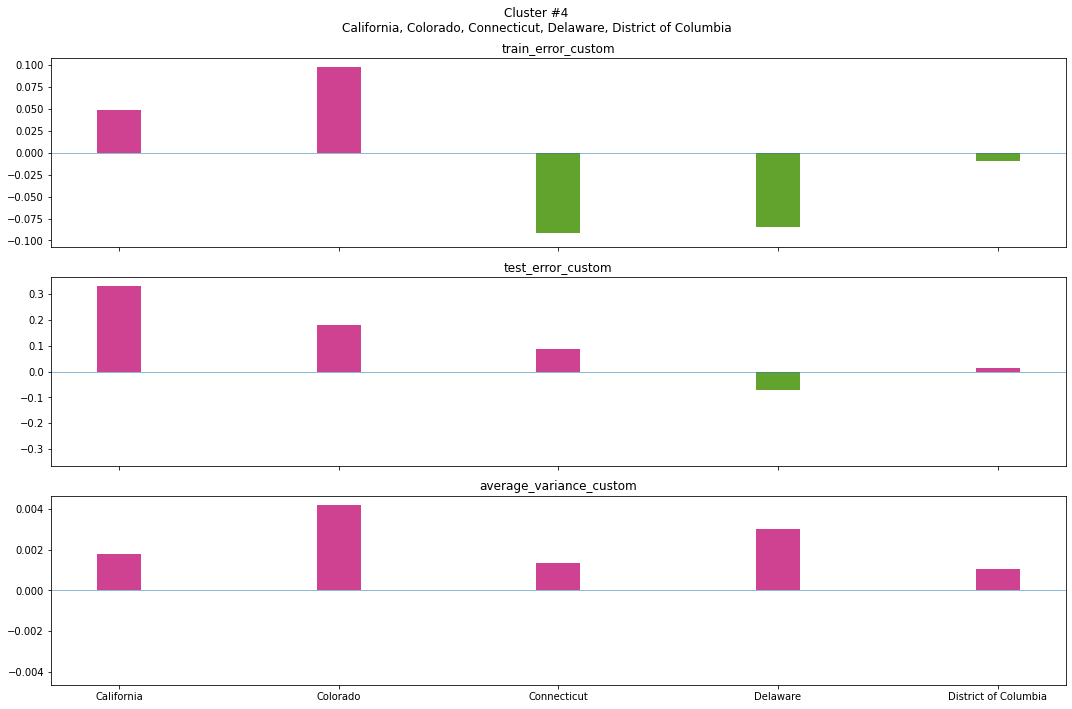

In [83]:
cluster = (
  'California',
  'Colorado',
  'Connecticut',
  'Delaware',
  'District of Columbia'
)

fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i, (att, vals) in enumerate(all_res[cluster][1].items()):
    if att == "test_error_custom":
        print(vals)
    xs = vals.keys()
    vals = np.array(list(vals.values()))
    axs[i].axhline(y = 0, lw=0.5)
    axs[i].bar(xs, np.ma.masked_less_equal(vals, 0), color="#cf4191", width=0.2)
    axs[i].bar(xs, np.ma.masked_where(vals>0, vals), color="#62a32e", width=0.2)
    axs[i].set_ylim([-np.max(np.abs(vals))*1.1, np.max(np.abs(vals))*1.1])
    axs[i].set_title(att)
    
fig.suptitle(f"Cluster #4\n{', '.join(cluster)}")
fig.tight_layout()

## Cluster 5

{'Florida': 0.14942280343303532, 'Georgia': 0.1013464480856478, 'Hawaii': 0.002700333011039705, 'Idaho': -0.07886050986624009, 'Indiana': 0.016380603518495823, 'Iowa': -0.07597233158866014, 'Kansas': -0.014847050967730249}


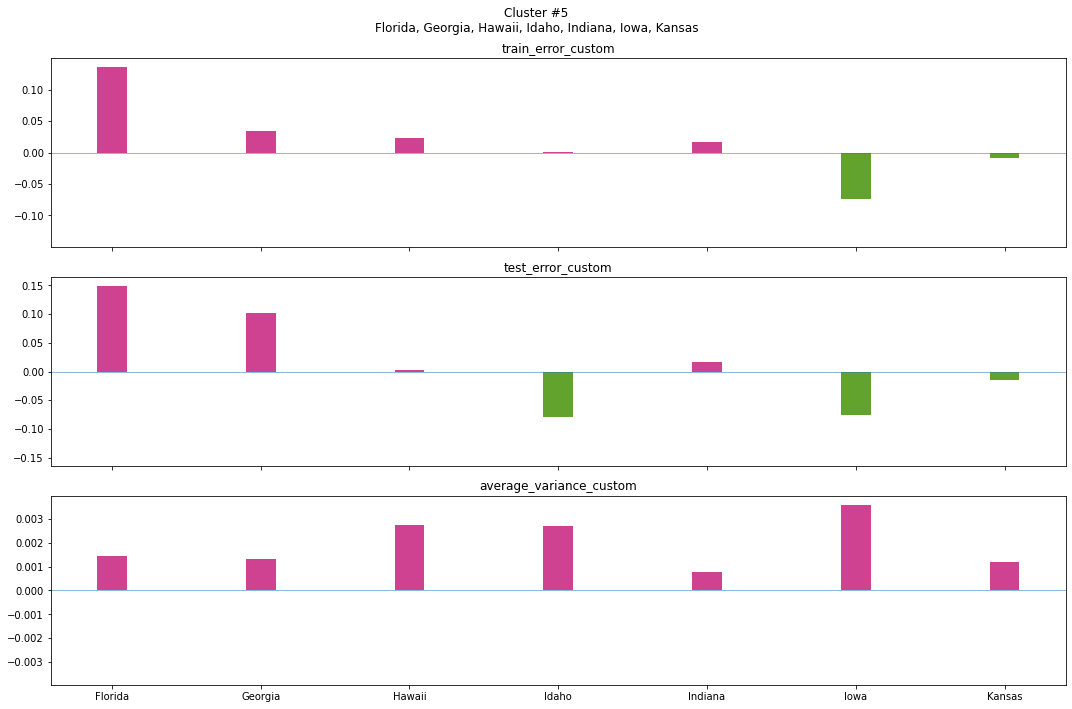

In [84]:
cluster = (
  'Florida',
  'Georgia',
  'Hawaii',
  'Idaho',
  'Indiana',
  'Iowa',
  'Kansas'
)

fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i, (att, vals) in enumerate(all_res[cluster][1].items()):
    if att == "test_error_custom":
        print(vals)
    xs = vals.keys()
    vals = np.array(list(vals.values()))
    axs[i].axhline(y = 0, lw=0.5)
    axs[i].bar(xs, np.ma.masked_less_equal(vals, 0), color="#cf4191", width=0.2)
    axs[i].bar(xs, np.ma.masked_where(vals>0, vals), color="#62a32e", width=0.2)
    axs[i].set_ylim([-np.max(np.abs(vals))*1.1, np.max(np.abs(vals))*1.1])
    axs[i].set_title(att)
    
fig.suptitle(f"Cluster #5\n{', '.join(cluster)}")
fig.tight_layout()

## Cluster 6

{'Alabama': 0.5790858837995072, 'Alaska': 0.06286966680392317}


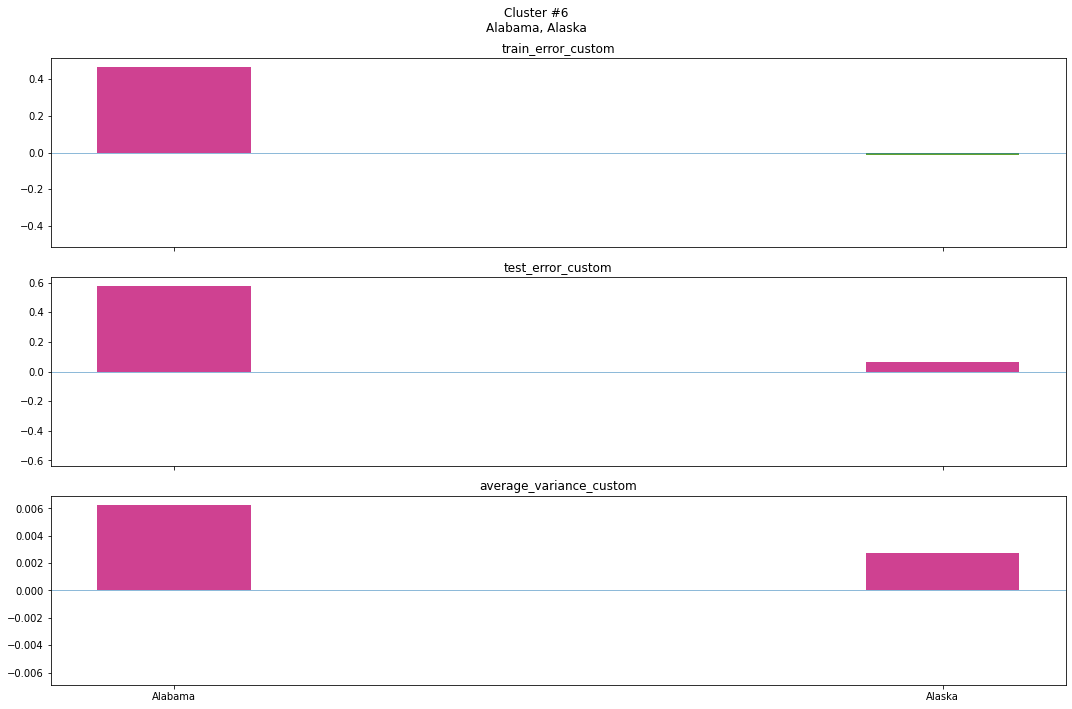

In [85]:
cluster = (
  'Alabama',
  'Alaska'
)

fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i, (att, vals) in enumerate(all_res[cluster][1].items()):
    if att == "test_error_custom":
        print(vals)
    xs = vals.keys()
    vals = np.array(list(vals.values()))
    axs[i].axhline(y = 0, lw=0.5)
    axs[i].bar(xs, np.ma.masked_less_equal(vals, 0), color="#cf4191", width=0.2)
    axs[i].bar(xs, np.ma.masked_where(vals>0, vals), color="#62a32e", width=0.2)
    axs[i].set_ylim([-np.max(np.abs(vals))*1.1, np.max(np.abs(vals))*1.1])
    axs[i].set_title(att)
    
fig.suptitle(f"Cluster #6\n{', '.join(cluster)}")
fig.tight_layout()

## Cluster 7

{'Arizona': 0.04206493142221812, 'Arkansas': 0.4091822008715974}


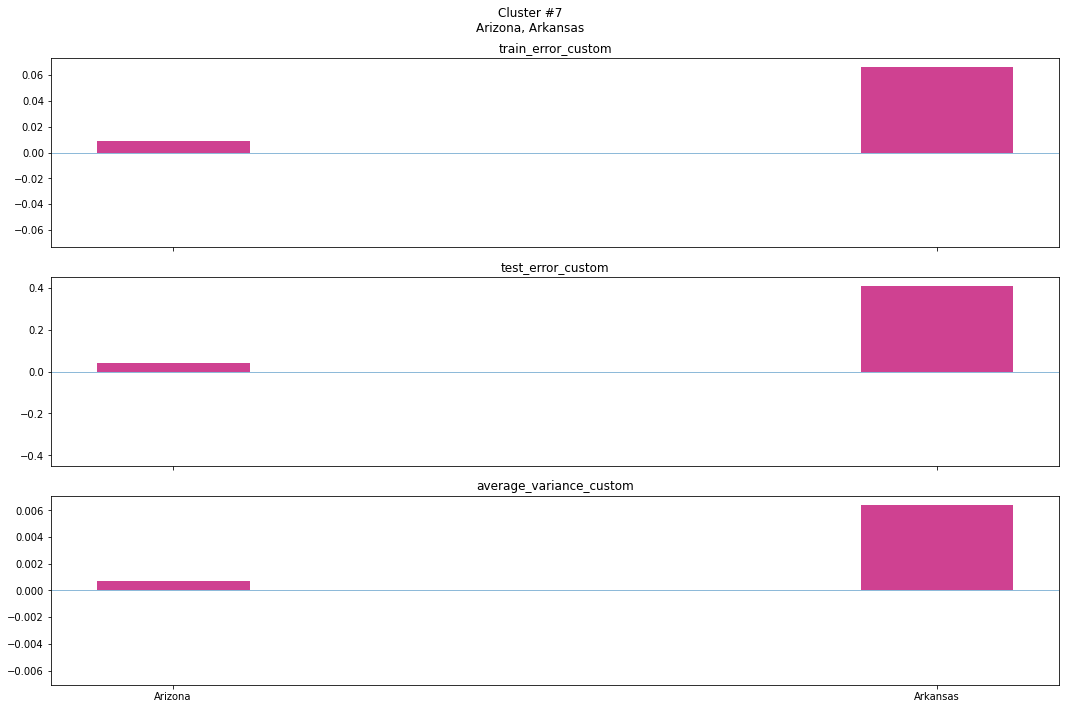

In [86]:
cluster = (
  'Arizona',
  'Arkansas'
)

fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i, (att, vals) in enumerate(all_res[cluster][1].items()):
    if att == "test_error_custom":
        print(vals)
    xs = vals.keys()
    vals = np.array(list(vals.values()))
    axs[i].axhline(y = 0, lw=0.5)
    axs[i].bar(xs, np.ma.masked_less_equal(vals, 0), color="#cf4191", width=0.2)
    axs[i].bar(xs, np.ma.masked_where(vals>0, vals), color="#62a32e", width=0.2)
    axs[i].set_ylim([-np.max(np.abs(vals))*1.1, np.max(np.abs(vals))*1.1])
    axs[i].set_title(att)
    
fig.suptitle(f"Cluster #7\n{', '.join(cluster)}")
fig.tight_layout()

## Cluster 8

{'Florida': 0.09836994649814138, 'Georgia': 0.10625154152496938, 'Hawaii': 0.003662096886541497, 'Idaho': -0.043529072807148746, 'Iowa': -0.06046482994258799, 'Kansas': -0.015364091372450154}


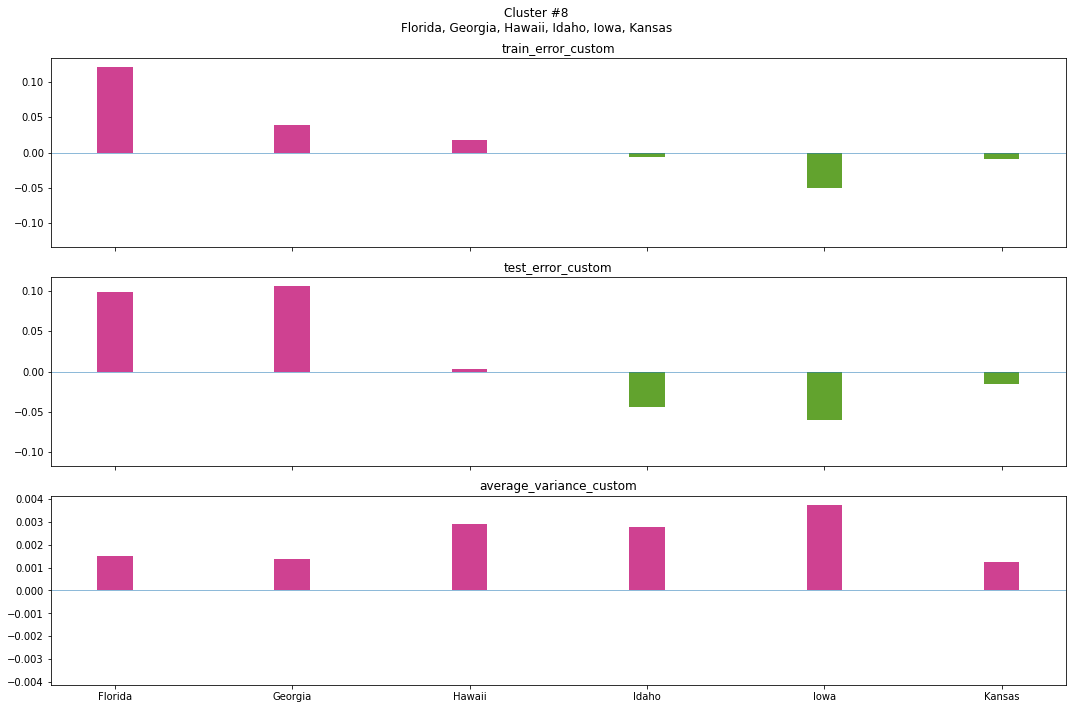

In [87]:
cluster = (
  'Florida',
  'Georgia',
  'Hawaii',
  'Idaho',
  'Iowa',
  'Kansas'
)

fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i, (att, vals) in enumerate(all_res[cluster][1].items()):
    if att == "test_error_custom":
        print(vals)
    xs = vals.keys()
    vals = np.array(list(vals.values()))
    axs[i].axhline(y = 0, lw=0.5)
    axs[i].bar(xs, np.ma.masked_less_equal(vals, 0), color="#cf4191", width=0.2)
    axs[i].bar(xs, np.ma.masked_where(vals>0, vals), color="#62a32e", width=0.2)
    axs[i].set_ylim([-np.max(np.abs(vals))*1.1, np.max(np.abs(vals))*1.1])
    axs[i].set_title(att)
    
fig.suptitle(f"Cluster #8\n{', '.join(cluster)}")
fig.tight_layout()

## Cluster 9

{'Florida': -0.07617759518311358, 'Georgia': 0.12768560000515847, 'Idaho': -0.03707952688368081, 'Iowa': -0.06783565005584946, 'Kansas': -0.015302022984421425}


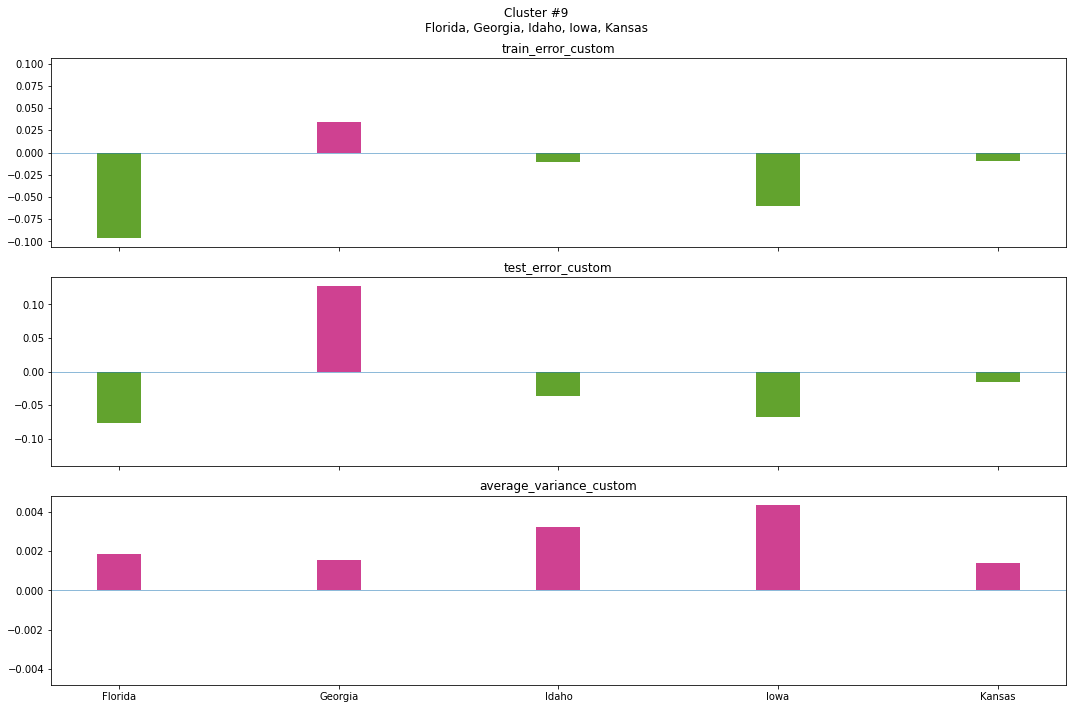

In [88]:
cluster = (
  'Florida',
  'Georgia',
  'Idaho',
  'Iowa',
  'Kansas'
)

fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i, (att, vals) in enumerate(all_res[cluster][1].items()):
    if att == "test_error_custom":
        print(vals)
    xs = vals.keys()
    vals = np.array(list(vals.values()))
    axs[i].axhline(y = 0, lw=0.5)
    axs[i].bar(xs, np.ma.masked_less_equal(vals, 0), color="#cf4191", width=0.2)
    axs[i].bar(xs, np.ma.masked_where(vals>0, vals), color="#62a32e", width=0.2)
    axs[i].set_ylim([-np.max(np.abs(vals))*1.1, np.max(np.abs(vals))*1.1])
    axs[i].set_title(att)
    
fig.suptitle(f"Cluster #9\n{', '.join(cluster)}")
fig.tight_layout()

## Cluster 10

{'Florida': -0.19114768508134874, 'Kansas': -0.02395005712730121}


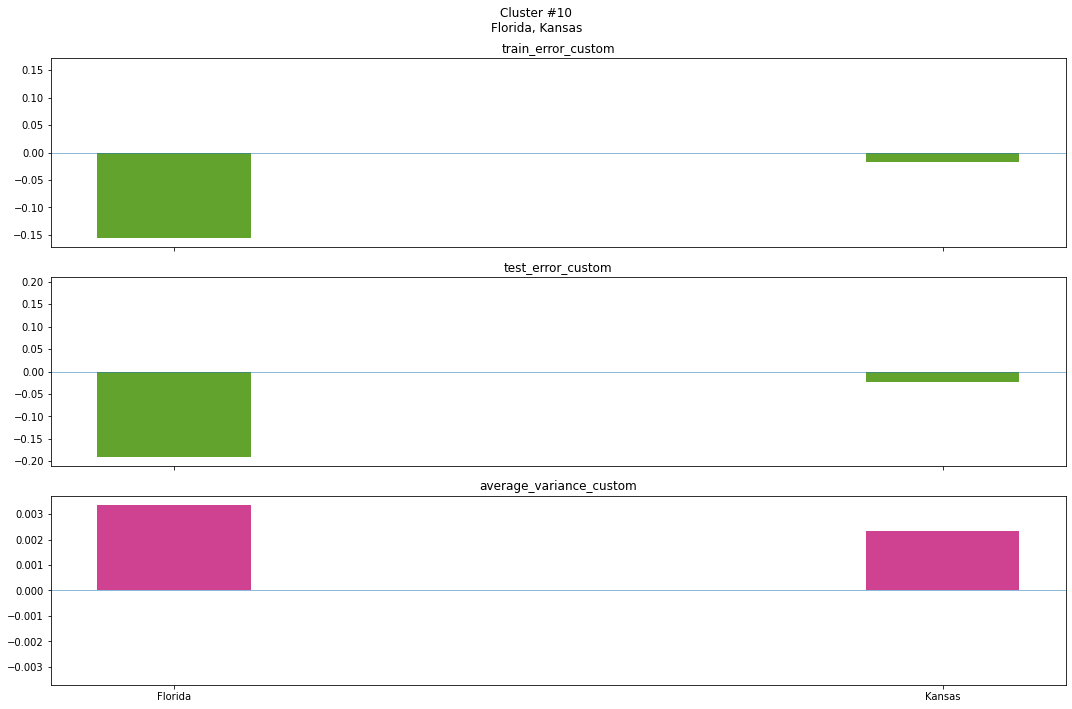

In [89]:
cluster = (
  'Florida',
  'Kansas'
)

fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i, (att, vals) in enumerate(all_res[cluster][1].items()):
    if att == "test_error_custom":
        print(vals)
    xs = vals.keys()
    vals = np.array(list(vals.values()))
    axs[i].axhline(y = 0, lw=0.5)
    axs[i].bar(xs, np.ma.masked_less_equal(vals, 0), color="#cf4191", width=0.2)
    axs[i].bar(xs, np.ma.masked_where(vals>0, vals), color="#62a32e", width=0.2)
    axs[i].set_ylim([-np.max(np.abs(vals))*1.1, np.max(np.abs(vals))*1.1])
    axs[i].set_title(att)
    
fig.suptitle(f"Cluster #10\n{', '.join(cluster)}")
fig.tight_layout()

## Cluster 11

{'Georgia': 0.04617255290713657, 'Idaho': 0.012743596699650974, 'Iowa': -0.06882584032723807}


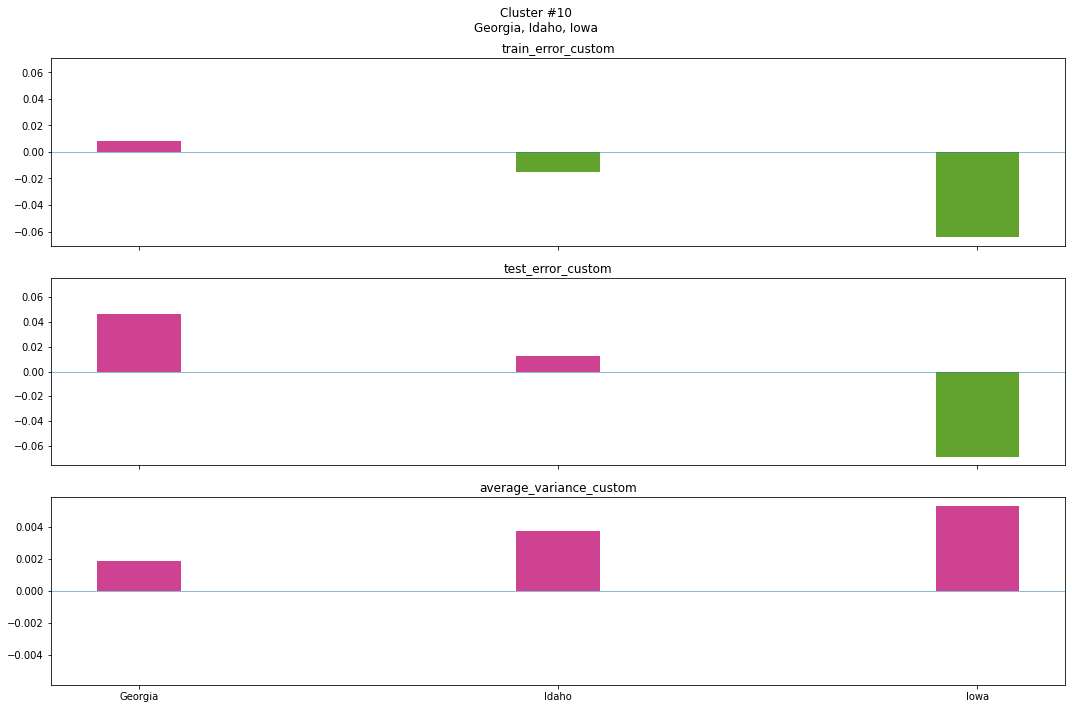

In [90]:
cluster = (
  'Georgia',
  'Idaho',
  'Iowa',
)

fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i, (att, vals) in enumerate(all_res[cluster][1].items()):
    if att == "test_error_custom":
        print(vals)
    xs = vals.keys()
    vals = np.array(list(vals.values()))
    axs[i].axhline(y = 0, lw=0.5)
    axs[i].bar(xs, np.ma.masked_less_equal(vals, 0), color="#cf4191", width=0.2)
    axs[i].bar(xs, np.ma.masked_where(vals>0, vals), color="#62a32e", width=0.2)
    axs[i].set_ylim([-np.max(np.abs(vals))*1.1, np.max(np.abs(vals))*1.1])
    axs[i].set_title(att)
    
fig.suptitle(f"Cluster #10\n{', '.join(cluster)}")
fig.tight_layout()

In [91]:
(full_interaction - no_interaction) / full_interaction

,train_error_custom,test_error_custom,average_variance_custom
States,,,
Alaska,-0.943987,-1.045005,-0.147706
Alabama,-0.662722,0.153904,0.030180
Arkansas,0.684385,0.218108,-0.001232
Arizona,-0.820725,-0.061617,-0.075655
California,0.456512,-1.116311,0.016096
Colorado,0.482091,0.842081,0.005620
Connecticut,-0.188225,0.503816,0.020489
District of Columbia,-0.398272,0.210566,-0.010407
Delaware,0.221842,0.050313,-0.057378


## Final Grouping based on out of sample error

- Alaska => None
- Alabama => None
- Arkansas => Alabama, Alaska, Arizona, California, Colorado, Connecticut, Delaware, District of Columbia
- Arizona => None
- California => None
- Colorado => All
- Connecticut => All
- District of Columbia => All
- Delaware => California, Colorado, Connecticut, District of Columbia
- Florida => Kansas
- Georgia => None
- Hawaii => None
- Iowa => Florida, Georgia, Hawaii, Idaho, Indiana, Kansas
- Idaho => None
- Illinois => All
- Indiana => All
- Kansas => None